**2)** Aplique a mesma técnica ao dataset abaixo e escolha o modelo de acordo com o ELPD LOO:

[Dataset do Tempo de Szeged no Kaggle](https://www.kaggle.com/datasets/budincsevity/szeged-weather)

Inclua também, para efeito de comparação, um modelo que não seja hierárquico.

In [1]:
import pandas as pd
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
df = pd.read_csv('weatherHistory.csv')
display(df)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [3]:
valores_vazios = df.isnull()
valores_sem_info = df.isna().sum()
print('\n Valores Vazios:', valores_vazios)
print('\n linhas sem informações', valores_sem_info)


 Valores Vazios:        Formatted Date  Summary  Precip Type  Temperature (C)  \
0               False    False        False            False   
1               False    False        False            False   
2               False    False        False            False   
3               False    False        False            False   
4               False    False        False            False   
...               ...      ...          ...              ...   
96448           False    False        False            False   
96449           False    False        False            False   
96450           False    False        False            False   
96451           False    False        False            False   
96452           False    False        False            False   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                         False     False              False   
1                         False     False              False   
2                    

In [4]:
df['Visibility (km)'] = df['Visibility (km)'].astype(float)
df['Visibility (km)'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 96453 entries, 0 to 96452
Series name: Visibility (km)
Non-Null Count  Dtype  
--------------  -----  
96453 non-null  float64
dtypes: float64(1)
memory usage: 753.7 KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


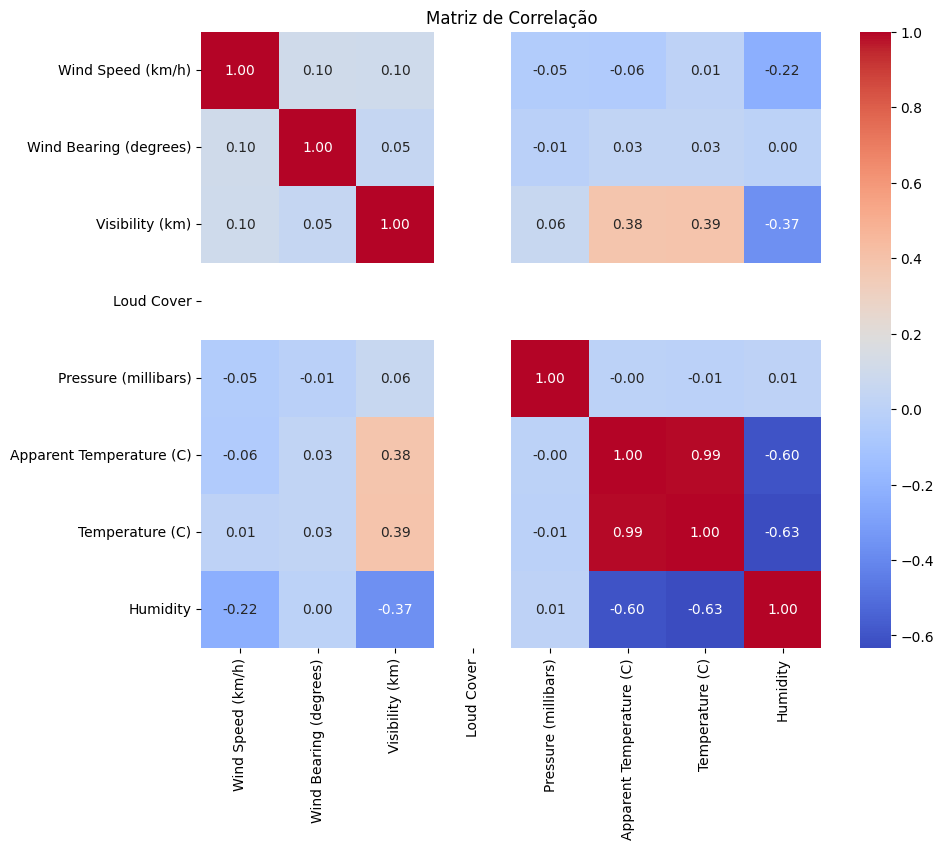

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


features = df[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
               'Loud Cover', 'Pressure (millibars)', 'Apparent Temperature (C)',
               'Temperature (C)', 'Humidity']]

correlation_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df['Wind_Bearing_rad'] = np.deg2rad(df['Wind Bearing (degrees)'])
df['Wind_Bearing_sin'] = np.sin(df['Wind_Bearing_rad'])
df['Wind_Bearing_cos'] = np.cos(df['Wind_Bearing_rad'])

features = ['Visibility (km)', 'Wind_Bearing_sin', 'Wind_Bearing_cos','Temperature (C)', 'Humidity']
X = df[features]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)
print("variância explicada pelos dois componentes do PCA = ", pca.explained_variance_ratio_)
soma_variancia_explicada = sum(pca.explained_variance_ratio_)
print(f"Soma da variância explicada: {soma_variancia_explicada * 100:.2f}%")

variância explicada pelos dois componentes do PCA =  [0.38886173 0.2334455 ]
Soma da variância explicada: 62.23%


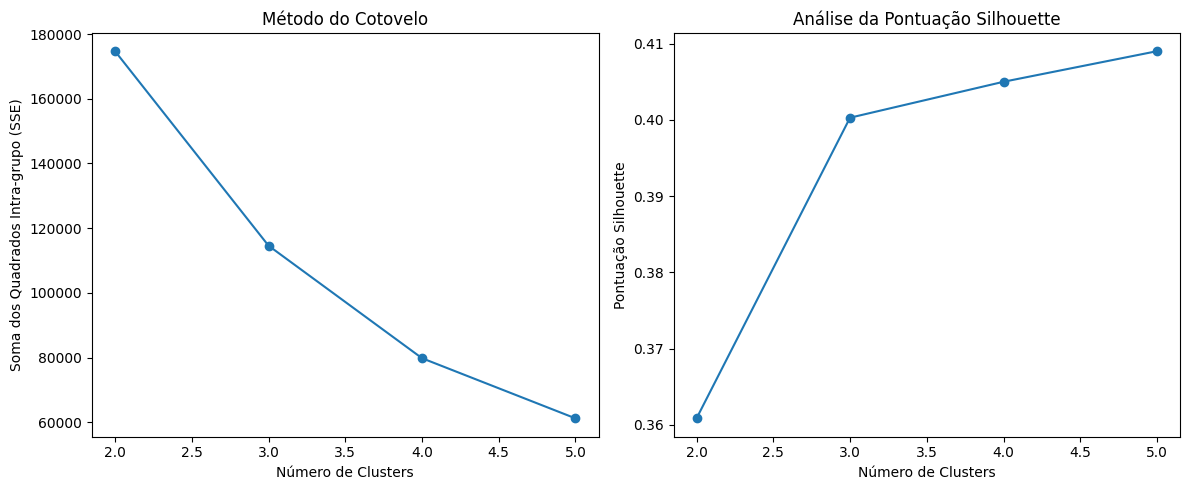

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
silhouette_scores = []
k_range = range(2, 6)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, labels))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Intra-grupo (SSE)')
plt.title('Método do Cotovelo')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação Silhouette')
plt.title('Análise da Pontuação Silhouette')

plt.tight_layout()
plt.show()

In [9]:
from sklearn.cluster import KMeans

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(X_pca)

df['cluster'] = cluster
display(df)



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Wind_Bearing_rad,Wind_Bearing_sin,Wind_Bearing_cos,cluster
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,4.380776,-0.945519,-0.325568,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,4.520403,-0.981627,-0.190809,3
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,3.560472,-0.406737,-0.913545,1
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4.694936,-0.999848,-0.017452,3
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4.520403,-0.981627,-0.190809,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,0.541052,0.515038,0.857167,3
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,0.349066,0.342020,0.939693,3
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,0.523599,0.500000,0.866025,3
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,0.349066,0.342020,0.939693,3


In [10]:
df.columns = df.columns.str.replace(r'[\(\)]', '', regex=True)
df.columns = [col.replace(" ", "_") for col in df.columns]
display(df)

,Formatted_Date,Summary,Precip_Type,Temperature_C,Apparent_Temperature_C,Humidity,Wind_Speed_km/h,Wind_Bearing_degrees,Visibility_km,Loud_Cover,Pressure_millibars,Daily_Summary,Wind_Bearing_rad,Wind_Bearing_sin,Wind_Bearing_cos,cluster
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,4.380776,-0.945519,-0.325568,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,4.520403,-0.981627,-0.190809,3
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,3.560472,-0.406737,-0.913545,1
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4.694936,-0.999848,-0.017452,3
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4.520403,-0.981627,-0.190809,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,0.541052,0.515038,0.857167,3
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,0.349066,0.342020,0.939693,3
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,0.523599,0.500000,0.866025,3
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,0.349066,0.342020,0.939693,3


In [11]:
df.to_csv('weatherHistory_cluster.csv', index=False)

In [12]:
df_2 = pd.read_csv('weatherHistory_cluster.csv')
display(df_2)

,Formatted_Date,Summary,Precip_Type,Temperature_C,Apparent_Temperature_C,Humidity,Wind_Speed_km/h,Wind_Bearing_degrees,Visibility_km,Loud_Cover,Pressure_millibars,Daily_Summary,Wind_Bearing_rad,Wind_Bearing_sin,Wind_Bearing_cos,cluster
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,4.380776,-0.945519,-0.325568,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,4.520403,-0.981627,-0.190809,3
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,3.560472,-0.406737,-0.913545,1
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4.694936,-0.999848,-0.017452,3
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4.520403,-0.981627,-0.190809,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,0.541052,0.515038,0.857167,3
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,0.349066,0.342020,0.939693,3
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,0.523599,0.500000,0.866025,3
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,0.349066,0.342020,0.939693,3


In [13]:
temp = df_2['Temperature_C'].values
humidity = df_2['Humidity'].values
wind_speed = df_2['Wind_Speed_km/h'].values #y
wind_bearing = df_2['Wind_Bearing_degrees'].values
visibility = df_2['Visibility_km'].values
cluster = df_2['cluster']



In [19]:
with pm.Model() as hierarchical_model_v1:
    b_temp = pm.Normal('b_temp', mu=0, sigma=10)
    b_humidity = pm.Normal('b_humidity', mu=0, sigma=10)
    b_wind_bearing  = pm.Normal('b_wind_bearing ', mu=0, sigma=100)
    b_visibility = pm.Normal('b_visibility', mu=0, sigma=50)
    sigma = pm.HalfNormal('sigma', sigma=10)

    a = pm.Normal('a', mu=0, sigma=10, shape=4)

    mu = a[cluster] +  b_temp  * temp + b_humidity * humidity + b_wind_bearing * wind_bearing + b_visibility * visibility

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed= wind_speed)

In [20]:
with hierarchical_model_v1:
  trace = pm.sample()

Output()

In [21]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],20.398,0.161,20.076,20.672,0.006,0.004,720.0,925.0,1.00
a[1],20.365,0.157,20.049,20.634,0.006,0.004,727.0,913.0,1.00
a[2],19.248,0.155,18.962,19.549,0.006,0.004,739.0,740.0,1.00
a[3],19.923,0.162,19.636,20.232,0.006,0.004,738.0,694.0,1.00
b_humidity,-13.250,0.153,-13.552,-12.974,0.005,0.003,832.0,1014.0,1.00
b_temp,-0.159,0.003,-0.166,-0.154,0.000,0.000,1137.0,1133.0,1.00
b_visibility,0.125,0.006,0.113,0.136,0.000,0.000,1200.0,1262.0,1.00
b_wind_bearing,0.006,0.000,0.006,0.007,0.000,0.000,1817.0,1481.0,1.00
sigma,6.568,0.015,6.539,6.596,0.000,0.000,1753.0,1543.0,1.01


In [22]:
import arviz as az

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'b_humidity'}>,
        <Axes: title={'center': 'b_humidity'}>],
       [<Axes: title={'center': 'b_temp'}>,
        <Axes: title={'center': 'b_temp'}>],
       [<Axes: title={'center': 'b_visibility'}>,
        <Axes: title={'center': 'b_visibility'}>],
       [<Axes: title={'center': 'b_wind_bearing '}>,
        <Axes: title={'center': 'b_wind_bearing '}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

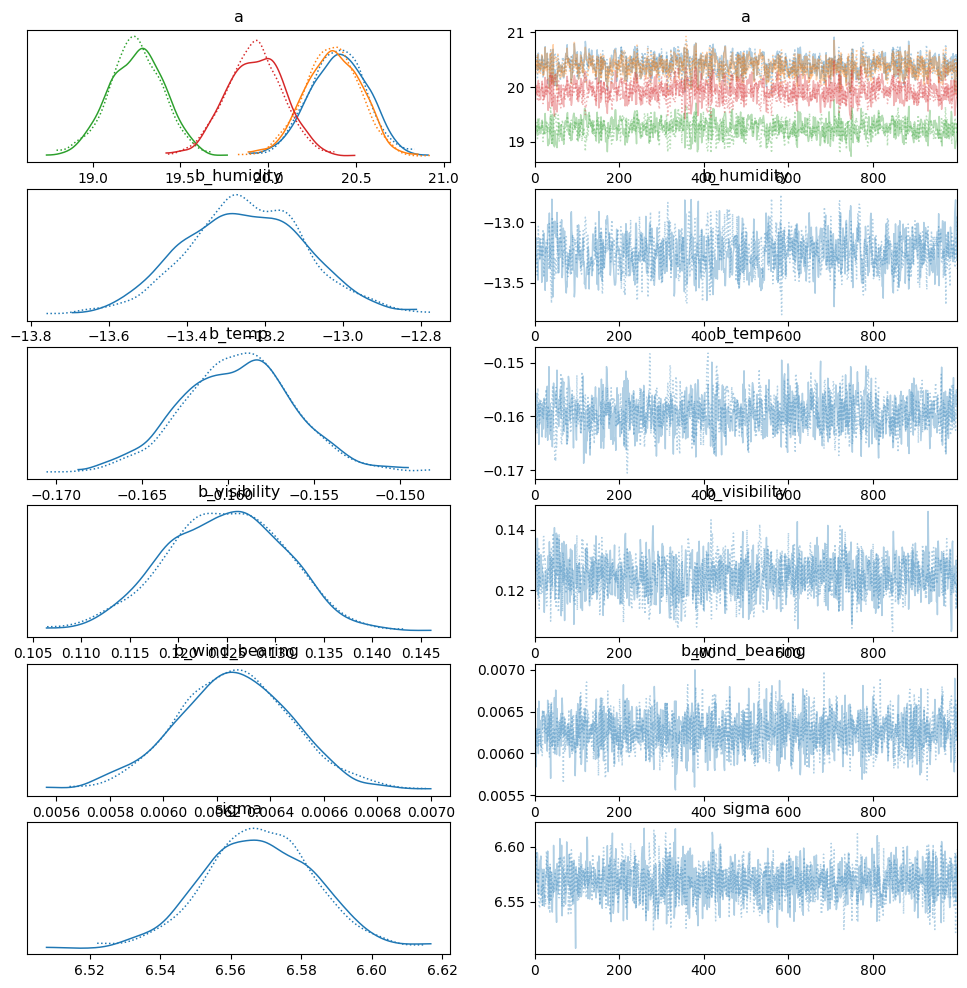

In [23]:
az.plot_trace(trace)

In [24]:
with pm.Model() as multi_linreg:

    alpha = pm.Normal('alpha', 0, 10)
    b_temp = pm.Normal('b_temp', mu=0, sigma=10)
    b_humidity = pm.Normal('b_humidity', mu=0, sigma=10)
    b_wind_bearing  = pm.Normal('b_wind_bearing ', mu=0, sigma=100)
    b_visibility = pm.Normal('b_visibility', mu=0, sigma=50)
    epsilon = pm.HalfNormal('epsilon', 10)

    mu = alpha +  b_temp  * temp + b_humidity * humidity + b_wind_bearing * wind_bearing + b_visibility * visibility
    Y_obs = pm.Normal('Y_obs', mu, epsilon, observed= wind_speed)

In [25]:
with multi_linreg:
  trace_3 = pm.sample()

Output()

In [26]:
pm.summary(trace_3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,19.854,0.150,19.553,20.117,0.005,0.004,911.0,1018.0,1.0
b_humidity,-12.613,0.143,-12.870,-12.335,0.005,0.004,967.0,879.0,1.0
b_temp,-0.176,0.003,-0.182,-0.171,0.000,0.000,1194.0,1125.0,1.0
b_visibility,0.098,0.006,0.088,0.109,0.000,0.000,1441.0,1237.0,1.0
b_wind_bearing,0.007,0.000,0.007,0.007,0.000,0.000,1778.0,1264.0,1.0
epsilon,6.576,0.016,6.547,6.605,0.000,0.000,1662.0,1132.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'b_humidity'}>,
        <Axes: title={'center': 'b_humidity'}>],
       [<Axes: title={'center': 'b_temp'}>,
        <Axes: title={'center': 'b_temp'}>],
       [<Axes: title={'center': 'b_visibility'}>,
        <Axes: title={'center': 'b_visibility'}>],
       [<Axes: title={'center': 'b_wind_bearing '}>,
        <Axes: title={'center': 'b_wind_bearing '}>],
       [<Axes: title={'center': 'epsilon'}>,
        <Axes: title={'center': 'epsilon'}>]], dtype=object)

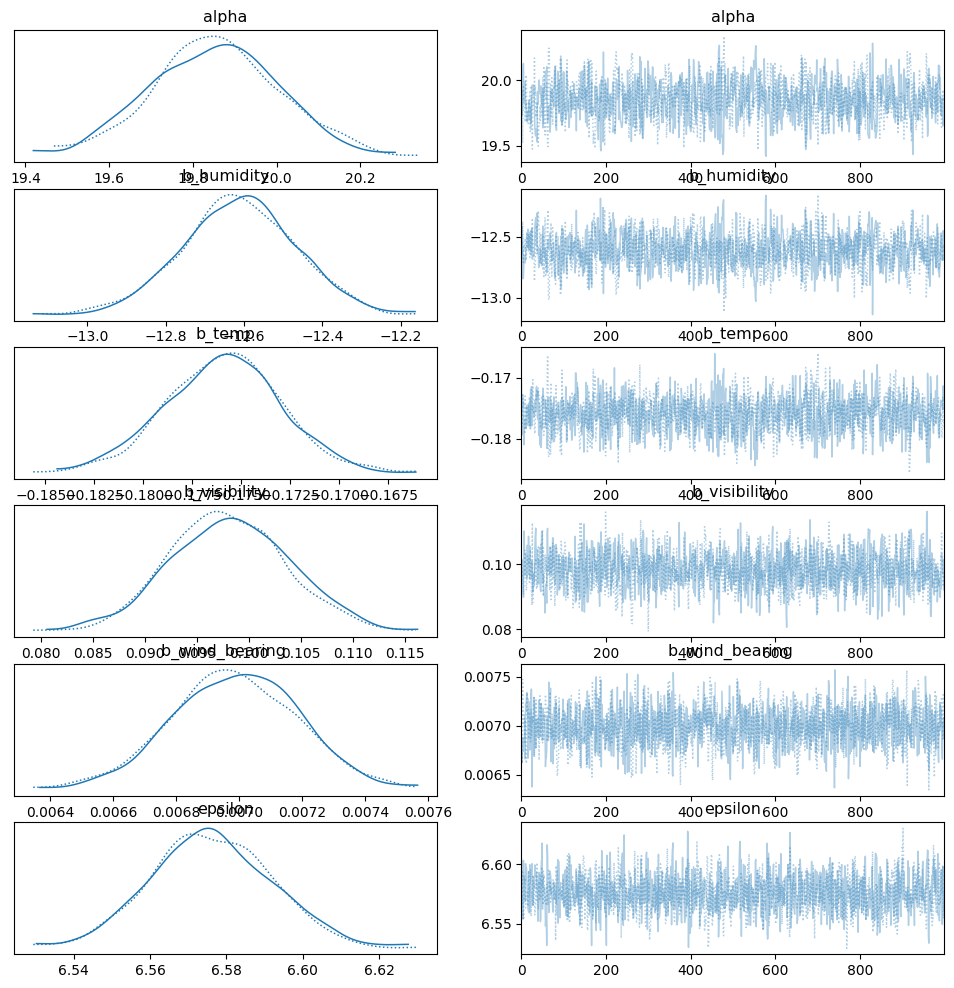

In [27]:
az.plot_trace(trace_3)

In [28]:
with hierarchical_model_v1:
    pm.compute_log_likelihood(trace)

with multi_linreg:
    pm.compute_log_likelihood(trace_3)

Output()

Output()

In [29]:
model_compare = az.compare(
    {
        "Hierarchical 1": trace,
        "multi_linreg": trace_3
    }, method='BB-pseudo-BMA'
)


In [30]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Hierarchical 1,0,-318415.560059,10.027368,0.000000,1.000000e+00,289.617428,0.00000,False,log
multi_linreg,1,-318523.819625,6.957878,108.259566,4.037259e-33,289.046817,14.91525,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

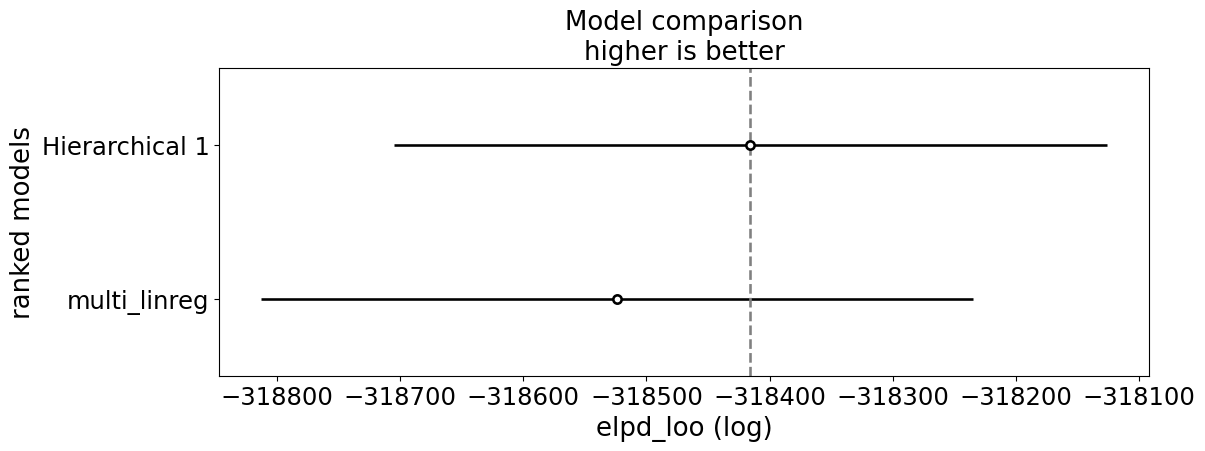

In [31]:
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

Melhor modelo foi o hierarchical_model